<Center>
    <h1 style="font-family: Roboto slab">
        <p>
        <font color="white">
            Sentiment Mining for Amazon Devices: 
            <br>
            Applying Natural Language Processing with Machine Learning and Deep Learning Techniques
        </font>
    </h1>
    <h3 style="font-family: Roboto slab">
        <font color="yellow">
            Notebook 4/5: Model Development
        </font>
    </h3>
</Center>

# I. Introduction & Context
---------------------------------------------------------------------------

### <font color = "yellow" >Objective:</font>
This project aims to build a sentiment analysis tool to classify customer reviews of Amazon devices as positive, negative, or neutral. <br>

The project involves preprocessing review text, extracting key features, and implementing both traditional machine learning models (Logistic Regression, Naive Bayes, Support Vector Machines, ...) and deep learning models (LSTM-based RNNs). After training and evaluating these models, the project will compare their performance to select the most effective one for deployment in the sentiment analysis tool. This approach ensures that the tool utilizes the best-performing model to deliver accurate sentiment classification, ultimately supporting better business decisions and product improvements.

### <font color = "yellow">Application Overview:</font>
This application approach is divided into 5 core steps:

<ul>
    <li>
        <u>Step 1:</u>  Data Collection
        <ul>
            <li> <b>Description:</b> Gather Amazon devices reviews from Amazon's website using web scraping techniques: Selenium, BeautifulSoup, scrape review data to capture review_id, Reviewer, Rating, Date, Review_title, Review_content, Product_id & Product_link</li>
            <li> <b> Output: </b> Raw dataset of Amazon device reviews, including review text, star ratings, and other relevant metadata.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 2:</u> Data Pre-Processing
        <ul>
            <li><b> Description: </b> Clean and prepare the review text for exploratory analysis. Identify and resolve missing values or inconsistencies in the dataset. Convert text to lowercase, remove special characters, stop words, punctuations; apply tokenization and lemmatization.
            </li>
            <li> <b> Output: </b> Cleaned dataset for EDA and model development.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 3:</u> Exploratory Data Analysis
        <ul>
            <li>Data Distribution: Analyze review counts across sentiment classes. </li>
            <li>Text Analysis: Review text length, word count, and common words.</li>
            <li>Sentiment Visualization: Visualize trends in positive, neutral, and negative reviews.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 4:</u > Model Development
         <ul>
            <li>Developing 5 machine learning and LSTM deep learning models.</li>
            <li>Evaluating models performance.</li>
            <li>Selecting the best model for final hyperparameter tuning</li>
            <li>Validating final model's predictions on 10 new real reviews</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 5:</u> Model Deployment
        <ul>
            <li>Deploy the sentiment analysis model via a Flask API and create a website for users to input reviews and view predicted sentiments in real-time.</li>
        </ul>
    </li>
</ul>

# II. Load Pre-Processed Data
---------------------------------------------------------------------------

## <font color = "red">1.  Libaries Import</font>

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# For Word Frequencies
from collections import Counter

# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="LightGBM")

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import joblib

# Deep Learning Models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from sklearn.metrics import classification_report, accuracy_score, fbeta_score, make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder

# For final model prediction
import html
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import nltk
import contractions
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vytran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vytran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vytran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vytran/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vytran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## <font color="red">2.  Dataset import</font>

In [144]:
# Load preprocessed dataset
process_reviews = pd.read_excel('../data/cleaned_amazon_reviews.xlsx')

In [145]:
# Check columns and rows
process_reviews.shape

(15791, 10)

In [146]:
pd.reset_option('display.max_colwidth')
process_reviews.head()

,Review_id,Rating,Product_id,Review_len,Word_count,Full_review,Sentiment,Day,Month,Year
0,R192QJ45JRSLTC,5,B08JHCVHTY,2558,356,not think need wish blink subscription basic p...,Positive,13,7,2024
1,RLJN0G2I0CRNC,5,B08JHCVHTY,190,37,worth every penny blink camera house year peac...,Positive,10,12,2024
2,R19D78F9YK0DVA,5,B08JHCVHTY,638,97,quite satisfied use blink subscription plus pl...,Positive,10,11,2024
3,R2W7QUYHDCN6CB,4,B08JHCVHTY,996,189,nice add security really like camera give u st...,Positive,26,9,2024
4,RM9R0N4N310DC,5,B08JHCVHTY,766,114,great item blink subscription plus plan fantas...,Positive,21,10,2024


# III. Machine Learning Model Development
---------------------------------------------------------------------------

## <font color="red">1.  Data Preparation</font>

### <font color="red">1.1. Feature Extraction and TF-IDF</font>

Feature extraction is the process of converting raw data into meaningful numerical features that machine learning models can use. 

In this project, TF-IDF (Term Frequency-Inverse Document Frequency) is used as the feature extraction technique to transform text reviews into numerical features. This tranformation helps machine learning models learn the importance of specific words in a document relative to the entire corpus by assigning a weight to each word. This ensures that words commonly used across all reviews (e.g., "the," "is") are weighted lower, while words specific to a review (e.g., "amazing," "poor") are given higher weights.

- **TF**: Counts the frequency of a word in a review.
- **IDF**: Reduces the weight of common words across multiple reviews.

Output: A sparse matrix of numerical features, where each column represents a word, and each row corresponds to a review.

Key considerations in this project:

- ngram_range=(1,2): Captures both unigrams (single words) and bigrams (two consecutive words) in the feature set.
- max_features=5000: Limits the number of features (terms or n-grams) to the top 5,000 based on their relevance in the dataset.
- min_df=1: Ensures terms appear in at least 1 document to be included in the feature matrix (effectively includes all terms).

In [147]:
# Define features and target variable
X = process_reviews['Full_review']  # Feature: text reviews
y = process_reviews['Sentiment']    # Target: sentiment labels

In [148]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=5000, 
    ngram_range=(1,2), 
    min_df=1                # Includes terms that appear in at least 1 document.
    )

# Generate the TF-IDF feature matrix
X_tfidf = vectorizer.fit_transform(X)

print("TF-IDF Matrix Shape:", X_tfidf.shape)

# Save the trained vectorizer to a file for later use
joblib.dump(vectorizer, '../models/tfidf_vectorizer.joblib')

TF-IDF Matrix Shape: (15791, 5000)


['../models/tfidf_vectorizer.joblib']

The TfidfVectorizer transforms the text data into a feature matrix where each row represents a review, and each column corresponds to a specific bigram (two-word sequence). The values represent the importance (weight) of the bigram in the review relative to the entire dataset

The shape of the TF-IDF matrix confirms the transformation:
- Rows (15697): Correspond to the number of reviews in the dataset.
- Columns (5000): Represent the selected bigrams.

### <font color="red">1.2. Train - Test Split</font>

The dataset is split into training and test sets with 80:20 ratio

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, shuffle=True)

### <font color="red">1.3. Imbalance handling with SMOTE</font>

Synthetic Minority Oversampling Technique (SMOTE) is a method used to address class imbalance in datasets. It works by generating synthetic samples for minority classes through interpolation between existing data points, creating a more balanced dataset for training machine learning models. SMOTE is particularly effective when the dataset has significantly fewer samples in one or more classes, which can lead to biased model predictions.

In [150]:
# Check class distribution before imbalance handling
print("Class distribution before train-test split:")
print(y.value_counts())  # Use Counter to display class counts

# Check class distribution in the training set
print("\nClass distribution in training set before SMOTE:")
print(y_train.value_counts())

Class distribution before train-test split:
Sentiment
Positive    8327
Neutral     4020
Negative    3444
Name: count, dtype: int64

Class distribution in training set before SMOTE:
Sentiment
Positive    6629
Neutral     3236
Negative    2767
Name: count, dtype: int64


In [151]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution in training set after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution in training set after SMOTE:
Sentiment
Positive    6629
Negative    6629
Neutral     6629
Name: count, dtype: int64


In [152]:
# Check the size of the original and resampled datasets
print("Original training set size:", y_train.shape[0])
print("Resampled training set size:", y_train_resampled.shape[0])
print("Number of synthetic samples added:", y_train_resampled.shape[0] - y_train.shape[0])

Original training set size: 12632
Resampled training set size: 19887
Number of synthetic samples added: 7255


After applying SMOTE, the class distribution in the training set is perfectly balanced, with an equal number of samples (6629) for each sentiment category: Positive, Negative, and Neutral. This ensures fair representation of all classes during training, reducing the risk of model bias toward the majority class and improving its ability to classify minority classes accurately.

### <font color="red">1.4. Evaluation Metric: F1-Score (Weighted Average) </font>

The **F1-score** balances precision and recall, making it effective for addressing both false positives and false negatives in sentiment analysis.  

The **weighted average** accounts for class imbalance, ensuring a fair evaluation of the model's performance across all sentiment categories.

In [153]:
# Defines the cross-validation strategy used to split the dataset into training and validation sets for model evaluation
cross_validation = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# Defines Weighted F1-score as the evaluation metric for hyperparameter search
def custom_f1_scorer(y_true, y_pred):
    """
    Custom F1 scorer to handle multiclass classification.
    Uses 'weighted' averaging to account for class imbalance.
    """
    return f1_score(y_true, y_pred, average='weighted')

# Wrap the custom function with make_scorer
f1_weighted_scorer = make_scorer(custom_f1_scorer)

## <font color="red">2.  Model Development</font>

**Five machine learning models will be trained using the resampled training dataset:**

- Logistic Regression: A linear model for classification that predicts probabilities for binary or multiclass outcomes.
- Naive Bayes: A probabilistic model suitable for text data and categorical features, based on Bayes' theorem.
- LinearSVC: A linear Support Vector Classifier optimized for large, high-dimensional datasets.
- Random Forest: An ensemble learning method based on decision trees, known for robustness and reduced overfitting.
- LightGBM: A gradient boosting framework optimized for speed and efficiency with large datasets.

**Work flow:**
- Defines a parameter grid for hyperparameter tuning.
- Uses GridSearchCV for cross-validation and hyperparameter optimization.
- Extracts the best parameters and trains the models.
- Evaluates the model on the test set.
- Saves the trained model as a .pkl file.

### <font color="red">2.1. Logistic Regression</font>

In [154]:
# Parameter grid
param_grid_log = {
    "C": [0.001, 0.01, 0.1, 1.0, 10, 100],       # The 'C' parameter controls the strength of regularization in Logistic Regression.
    "solver": ["liblinear", "lbfgs", "saga"]     # The 'solver' parameter specifies the optimization algorithm to use for training Logistic Regression.
}

# Initialize Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform GridSearchCV
grid_search_log = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid_log,
    cv=cross_validation,         
    scoring=f1_weighted_scorer, # # Weighted F1-score as the evaluation metric for hyperparameter search
    verbose=True,               # Displays progress and status of the grid search.
    n_jobs=1                    # Parallelizes the computation to speed up the search.
)

# Fit the GribSearchCV on training data
grid_search_log.fit(X_train_resampled, y_train_resampled)

# Extract the best parameters and cross-validation accuracy
best_params_log = grid_search_log.best_params_
print(f"Best Parameters for Logistic Regression: {best_params_log}")
print(f"Best Cross-Validation Accuracy: {grid_search_log.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_log = grid_search_log.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_log.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_log, '../models/logistic_regression_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8418
Model saved successfully!


In [155]:
# Generate confusion matrix for model prediction using panda crosstab
cm_log = pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_log

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,481,105,91
Neutral,118,529,137
Positive,131,219,1348


In [156]:
# Create classification report with evaluation metrics
report_log = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_log = report_log["weighted avg"]

# Access evaluation metrics
accuracy_log = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_log = round(weighted_avg_log["recall"], 2)
precision_log = round(weighted_avg_log["precision"], 2)
f1_score_log = round(weighted_avg_log["f1-score"], 2)
f3_score_log = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [157]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.71      0.68       677
     Neutral       0.62      0.67      0.65       784
    Positive       0.86      0.79      0.82      1698

    accuracy                           0.75      3159
   macro avg       0.71      0.73      0.72      3159
weighted avg       0.75      0.75      0.75      3159



### <font color="red">2.2.  Random Forest</font>

In [158]:
# Parameter grid
param_grid_rf = {
    "n_estimators": [75, 100, 125, 150, 175],  # Number of trees in the forest
    "max_depth": [7, 12],  # Maximum depth of the tree
    "min_samples_split": [2, 3],  # Minimum samples required to split a node
    "criterion": ["gini", "entropy"],  # Splitting criteria
    "min_samples_leaf": [1, 3]
}

# Initialize Model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=cross_validation,         
    scoring=f1_weighted_scorer,     # Weighted F1-score as the evaluation metric for hyperparameter search
    verbose=True,                   # Displays progress and status of the grid search.
    n_jobs=-1                       # Parallelizes the computation to speed up the search.
)

# Fit the GribSearchCV on training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Extract the best parameters and cross-validation accuracy
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_rf = grid_search_rf.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_rf.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_rf, '../models/random_forest_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.7627
Model saved successfully!


In [159]:
# Generate confusion matrix for model prediction using panda crosstab
cm_rf= pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_rf

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,414,158,105
Neutral,117,546,121
Positive,110,226,1362


In [160]:
# Create classification report with evaluation metrics
report_rf = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_rf = report_rf["weighted avg"]

# Access evaluation metrics
accuracy_rf = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_rf = round(weighted_avg_rf["recall"], 2)
precision_rf = round(weighted_avg_rf["precision"], 2)
f1_score_rf = round(weighted_avg_rf["f1-score"], 2)
f3_score_rf = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [161]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.61      0.63       677
     Neutral       0.59      0.70      0.64       784
    Positive       0.86      0.80      0.83      1698

    accuracy                           0.74      3159
   macro avg       0.70      0.70      0.70      3159
weighted avg       0.75      0.74      0.74      3159



### <font color="red">2.3.  Naive Bayes</font>

In [162]:
# Parameter grid
param_grid_nb = {
    # The 'alpha' parameter is used for smoothing in Naive Bayes
    "alpha": [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Initialize Model
nb_model = MultinomialNB()

# Perform GridSearchCV
grid_search_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid_nb,
    cv=cross_validation,         
    scoring=f1_weighted_scorer,      # Weighted F1-score as the evaluation metric for hyperparameter search   
    verbose=1,                   
    n_jobs=-1                   
)

# Fit the GribSearchCV on training data
grid_search_nb.fit(X_train_resampled, y_train_resampled)

# Extract the best parameters and cross-validation accuracy
best_params_nb = grid_search_nb.best_params_
print(f"Best Parameters for Naive Bayes: {best_params_nb}")
print(f"Best Cross-Validation Accuracy: {grid_search_nb.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_nb = grid_search_nb.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_nb.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_nb, '../models/naive_bayes_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for Naive Bayes: {'alpha': 0.1}
Best Cross-Validation Accuracy: 0.7888
Model saved successfully!


In [163]:
# Generate confusion matrix for model prediction using panda crosstab
cm_nb= pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_nb

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,485,100,92
Neutral,109,558,117
Positive,127,170,1401


In [164]:
# Create classification report with evaluation metrics
report_nb = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_nb = report_nb["weighted avg"]

# Access evaluation metrics
accuracy_nb = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_nb = round(weighted_avg_nb["recall"], 2)
precision_nb = round(weighted_avg_nb["precision"], 2)
f1_score_nb = round(weighted_avg_nb["f1-score"], 2)
f3_score_nb = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [165]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.72      0.69       677
     Neutral       0.67      0.71      0.69       784
    Positive       0.87      0.83      0.85      1698

    accuracy                           0.77      3159
   macro avg       0.74      0.75      0.74      3159
weighted avg       0.78      0.77      0.78      3159



### <font color="red">2.4. LinearSVC (Linear Support Vector Machine)</font>

In [166]:
# Parameter grid
param_grid_linear_svc = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Fine-tuned range for regularization strength
    "penalty": ["l2"],                                  # Regularization type
    "dual": [False],                                    # Suitable for small datasets
    "loss": ["squared_hinge"],                          # Compare different loss functions
    "tol": [1e-3, 1e-4],                                # Tolerance for stopping criteria
    "class_weight": [None, "balanced"],                 # Handle imbalanced classes
}

# Initialize Linear SVM Model
linear_svc_model = LinearSVC(random_state=42, max_iter=10000)


# Perform GridSearchCV
grid_search_linear_svc = GridSearchCV(
    estimator=linear_svc_model,
    param_grid=param_grid_linear_svc,
    cv=cross_validation,         
    scoring=f1_weighted_scorer,        # Weighted F1-score as the evaluation metric for hyperparameter search  
    verbose=1,                   
    n_jobs=-1                    
)

# Fit the GribSearchCV on training data
grid_search_linear_svc.fit(X_train_resampled, y_train_resampled)

# Extract the best parameters and cross-validation accuracy
best_params_linear_svc = grid_search_linear_svc.best_params_
print(f"Best Parameters for LinearSVC: {best_params_linear_svc}")
print(f"Best Cross-Validation Accuracy: {grid_search_linear_svc.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_linear_svc = grid_search_linear_svc.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_linear_svc.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_linear_svc, '../models/linearsvc_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters for LinearSVC: {'C': 10, 'class_weight': 'balanced', 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.0001}
Best Cross-Validation Accuracy: 0.8376
Model saved successfully!


In [167]:
# Generate confusion matrix for model prediction using panda crosstab
cm_linear_svc= pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_linear_svc

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,475,109,93
Neutral,119,520,145
Positive,133,227,1338


In [168]:
# Create classification report with evaluation metrics
report_linear_svc = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_linear_svc = report_linear_svc["weighted avg"]

# Access evaluation metrics
accuracy_linear_svc = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_linear_svc = round(weighted_avg_linear_svc["recall"], 2)
precision_linear_svc = round(weighted_avg_linear_svc["precision"], 2)
f1_score_linear_svc = round(weighted_avg_linear_svc["f1-score"], 2)
f3_score_linear_svc = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [169]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.70      0.68       677
     Neutral       0.61      0.66      0.63       784
    Positive       0.85      0.79      0.82      1698

    accuracy                           0.74      3159
   macro avg       0.70      0.72      0.71      3159
weighted avg       0.75      0.74      0.74      3159



### <font color="red">2.5. LightGBM (Light Gradient Boosting Machine)</font>

In [170]:
# Define a custom evaluation metric for LightGBM
def custom_f1_metric_lightgbm(y_true, y_pred):
    """
    Custom metric for LightGBM to compute the weighted F1-score during training.

    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted probabilities for each class

    Returns:
    - Metric name ("f1_score"), computed F1-score, and a boolean indicating that higher is better
    """
    y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to predicted class labels
    f1 = f1_score(y_true, y_pred_classes, average="weighted")
    return "f1_score", f1, True  # Return metric name, value, and "higher is better" indicator

In [171]:
# Parameter grid
param_grid_lgbm = {
    "learning_rate": [0.01, 0.1],  # Controls the contribution of each tree during boosting
    "n_estimators": [50, 100],     # Number of boosting stages (trees) to train
    "max_depth": [-1, 20],         # Maximum depth of the trees (-1 means no limit)
    "num_leaves": [31, 50],        # Maximum number of leaves per tree (controls tree complexity)
    "min_data_in_leaf": [10, 20]   # Minimum number of samples required in a leaf node
}

# Initialize Model
lgbm_model = LGBMClassifier(
    random_state=42, 
    force_row_wise=True,    # Optimizes memory usage by processing data row-wise
    min_split_gain=0.001    # Minimum gain required to split a node
    )

# Define callbacks to enhance training
callbacks = [
    early_stopping(stopping_rounds=10),  # Stops training if no improvement for 10 rounds
    log_evaluation(period=10)            # Logs training progress every 10 iterations
]

# Initialize GridSearchCV for hyperparameter tuning
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid_lgbm,
    cv=cross_validation,         
    scoring=f1_weighted_scorer,         # Weighted F1-score as the evaluation metric for hyperparameter search
    verbose=True,
    n_jobs=-1                                    
)

# Fit the GribSearchCV on training data
grid_search_lgbm.fit(
    X_train_resampled, 
    y_train_resampled, 
    eval_set=[(X_test, y_test)],                 # Validation set for monitoring during training
    eval_metric=custom_f1_metric_lightgbm,       # Custom F1-score metric for validation
    callbacks= callbacks)                        # Callbacks for early stopping and logging

# Extract the best parameters and cross-validation accuracy
best_params_lgbm = grid_search_lgbm.best_params_
print(f"Best Parameters for LightGBM: {best_params_lgbm}")
print(f"Best Cross-Validation Accuracy: {grid_search_lgbm.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_lgbm = grid_search_lgbm.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_lgbm.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_lgbm, '../models/lightgbm_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored

In [172]:
# Generate confusion matrix for model prediction using panda crosstab
cm_lgbm= pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_lgbm

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,502,93,82
Neutral,94,557,133
Positive,85,165,1448


In [173]:
# Create classification report with evaluation metrics
report_lgbm = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_lgbm = report_lgbm["weighted avg"]

# Access evaluation metrics
accuracy_lgbm = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_lgbm = round(weighted_avg_lgbm["recall"], 2)
precision_lgbm = round(weighted_avg_lgbm["precision"], 2)
f1_score_lgbm = round(weighted_avg_lgbm["f1-score"], 2)
f3_score_lgbm = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [174]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
classification_report_lgbm = classification_report(y_test, y_pred)
print(classification_report_lgbm)

Test Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.74      0.74       677
     Neutral       0.68      0.71      0.70       784
    Positive       0.87      0.85      0.86      1698

    accuracy                           0.79      3159
   macro avg       0.76      0.77      0.77      3159
weighted avg       0.80      0.79      0.79      3159



# IV. Deep Learning Model Development - LSTM
---------------------------------------------------------------------------

## <font color="red">1.  Data Preparation</font>

In [175]:
# Define features and target variable
X = process_reviews['Full_review']  # Feature: text reviews
y = process_reviews['Sentiment']    # Target: sentiment labels

### <font color="red">1.1.  Encode Sentiment Labels To Integers</font>

Converting sentiment labels to numerical data is necessary when training an LSTM model (or any other deep learning model) because neural networks process numerical data, not categorical strings.

In [ ]:
# Encode sentiment labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the count of each label
pd.Series(y_encoded).value_counts()

2    8327
1    4020
0    3444
Name: count, dtype: int64

### <font color="red">1.2. Tokenization</font>

This step transforms raw text into a structured input format compatible with LSTM models by converting variable-length and complex text into a fixed numerical format.
- The Tokenizer class from **Keras** library converts words in the text data (X) into sequences of numerical tokens
- By setting num_words=10000, the tokenizer considers only the 10,000 most frequent words, reducing noise and memory usage for large datasets.
- Less frequent words are either ignored or replaced with the **oov_token** representing out-of-vocabulary words.
- **texts_to_sequences** transforms each text sample into a sequence of integers, preserving the order of words.

In [ ]:
# Tokenizes the top 10,000 words and handles out-of-vocab tokens
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  

# Fit the tokenizer on text data
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(X)  

# View a sample of the tokenized sequences
print("Sample tokenized sequence:", X_seq[:5])  # Display the first 5 sequences

# Save the trained tokenizerd to a file for later use
joblib.dump(tokenizer, '../models/tokenizer.joblib')

Sample tokenized sequence: [[2, 55, 29, 239, 267, 387, 457, 355, 332, 2002, 82, 305, 267, 47, 197, 15, 245, 1099, 425, 738, 2319, 615, 387, 355, 998, 447, 267, 15, 678, 616, 563, 197, 4334, 966, 82, 678, 616, 457, 355, 237, 678, 616, 76, 957, 893, 267, 15, 1065, 1671, 2410, 6755, 1, 875, 2088, 660, 15, 1020, 894, 3091, 292, 400, 76, 957, 267, 44, 220, 73, 690, 3416, 1367, 82, 4064, 732, 47, 197, 85, 825, 1100, 146, 110, 3092, 2899, 457, 355, 332, 4065, 151, 305, 36, 457, 678, 616, 109, 3185, 9595, 355, 245, 2002, 197, 82, 1128, 1079, 2815, 387, 1024, 1374, 355, 549, 267, 15, 279, 1065, 1224, 465, 447, 710, 163, 128, 1, 1901, 605, 267, 44, 245, 1901, 605, 726, 15, 211, 231, 203, 1273, 292, 373, 76, 957, 28, 32, 305, 732, 47, 286, 1746, 197, 9596, 1, 895, 267, 387, 457, 355, 3093, 4976, 998, 615, 267, 15, 678, 616, 133, 292, 76, 957, 245, 103, 197, 983, 28, 2411, 1714, 3537, 57, 7843, 47, 197, 128, 173, 520, 173, 1128, 678, 616, 601, 292, 400, 76, 957, 443, 267, 44, 1374, 267, 15, 9597, 

['../models/tokenizer.joblib']

### <font color="red">1.3. Padding and Truncating</font>

Padding and truncating ensures that all sequences in a batch data have the same length for use in deep learning models.

A function from the **tensorflow.keras.preprocessing.sequence** module that standardizes sequence lengths by "padding" or "truncating".

In [178]:
# Set a fixed length for all sequences
max_sequence_length = 64  

# Padding adds zeros to the end of shorter sequences, while truncating removes tokens from the end of longer ones.
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length, padding="post", truncating="post")

# Display the first 5 padded sequences
print("First 5 padded sequences:")
for i in range(5):
    print(f"Original sequence: {X_seq[i]}")
    print(f"Padded/Truncated sequence: {X_padded[i]}")
    print("-" * 50)

First 5 padded sequences:
Original sequence: [2, 55, 29, 239, 267, 387, 457, 355, 332, 2002, 82, 305, 267, 47, 197, 15, 245, 1099, 425, 738, 2319, 615, 387, 355, 998, 447, 267, 15, 678, 616, 563, 197, 4334, 966, 82, 678, 616, 457, 355, 237, 678, 616, 76, 957, 893, 267, 15, 1065, 1671, 2410, 6755, 1, 875, 2088, 660, 15, 1020, 894, 3091, 292, 400, 76, 957, 267, 44, 220, 73, 690, 3416, 1367, 82, 4064, 732, 47, 197, 85, 825, 1100, 146, 110, 3092, 2899, 457, 355, 332, 4065, 151, 305, 36, 457, 678, 616, 109, 3185, 9595, 355, 245, 2002, 197, 82, 1128, 1079, 2815, 387, 1024, 1374, 355, 549, 267, 15, 279, 1065, 1224, 465, 447, 710, 163, 128, 1, 1901, 605, 267, 44, 245, 1901, 605, 726, 15, 211, 231, 203, 1273, 292, 373, 76, 957, 28, 32, 305, 732, 47, 286, 1746, 197, 9596, 1, 895, 267, 387, 457, 355, 3093, 4976, 998, 615, 267, 15, 678, 616, 133, 292, 76, 957, 245, 103, 197, 983, 28, 2411, 1714, 3537, 57, 7843, 47, 197, 128, 173, 520, 173, 1128, 678, 616, 601, 292, 400, 76, 957, 443, 267, 44, 1374

### <font color="red">1.4. Train-Test Split</font>

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, shuffle=True, stratify=y)

### <font color="red">1.5. Convert labels to Categorical format</font>

Converts the target labels into a categorical (one-hot encoded) format: binary vectors, which is commonly used in deep learning models, particularly for multi-class classification. 

In [180]:
# Converts integer labels into one-hot encoded vectors.
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

print("X_train shape:", X_train.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)

# Display the first 5 one-hot encoded vectors
print("\nFirst 5 one-hot encoded labels (y_train_one_hot):")
for i in range(5):
    print(f"Integer label: {y_train[i]}")
    print(f"One-hot vector: {y_train_one_hot[i]}")
    print("-" * 50)

X_train shape: (12632, 64)
y_train_one_hot shape: (12632, 3)

First 5 one-hot encoded labels (y_train_one_hot):
Integer label: 2
One-hot vector: [0. 0. 1.]
--------------------------------------------------
Integer label: 2
One-hot vector: [0. 0. 1.]
--------------------------------------------------
Integer label: 2
One-hot vector: [0. 0. 1.]
--------------------------------------------------
Integer label: 0
One-hot vector: [1. 0. 0.]
--------------------------------------------------
Integer label: 0
One-hot vector: [1. 0. 0.]
--------------------------------------------------


**Shapes After Conversion:**
- X_train Shape: (12632, 64): Represents 12,632 samples with 74 features each (e.g., text embeddings or other features).
- y_train_one_hot Shape: (12632, 3): Represents 12,632 samples, each with a one-hot encoded vector of length 3 for the three classes (Negative, Neutral, Positive).

## <font color="red">2.  Model Development</font>

**Model Architecture***
This step defines an architecture of the LSTM-based model for multi-class sentiment classification:

- Input Layer: Specifies the input shape as a sequence of tokens.
- Embedding Layer: Converts words into dense vector representations.
- LSTM Layer: Learns sequential dependencies in text.
- Dropout: Prevents overfitting.
- Dense Layer: Outputs probabilities for 3 sentiment classes (Negative, Neutral, Positive).

In [181]:
# Initialize a sequential model

# Define sequence length
sequence_length = 64  # Example sequence length
model = Sequential([
    
    # Input Layer to specify the input shape as a sequence of tokens
    Input(shape=(sequence_length,)),  # Explicitly define the input shape

    # Embedding Layer to convert words into dense vectors
    Embedding(input_dim=10000, output_dim=64),
    Dropout(0.3), # Prevents overfitting by randomly dropping 30% of connections during training.
    
    # LSTM Layer for sequential data processing: Processes sequential data and learns dependencies in the sequence.
    LSTM(units=64, return_sequences=False),  # return_sequences=False because we don't need outputs at every step
    Dropout(0.3),
    
    # Dense Output Layer with softmax for multi-class classification: Produces probabilities for 3 sentiment classes
    Dense(units=3, activation='softmax')  # 3 sentiment classes: Negative, Neutral, Positive
])


In [182]:
# Compile the Model
model.compile(
    optimizer='adam',  # Adjusts weights to minimize loss efficiently.
    loss='categorical_crossentropy',  # Measures the error for multi-class classification.
    metrics=['accuracy']   # Evaluation metric
)

# Model Summary
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 64, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,219 (2.57 MB)

 Trainable params: 673,219 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [183]:
# Train the model and save the training history
history = model.fit(
    X_train, y_train_one_hot,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=20,            # Adjust epochs based on dataset size
    batch_size=32,        # Mini-batch size for gradient updates
    verbose=1             # Display training progress
)

Epoch 1/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5060 - loss: 1.0349 - val_accuracy: 0.5497 - val_loss: 0.8981
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5643 - loss: 0.8937 - val_accuracy: 0.6086 - val_loss: 0.8608
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6399 - loss: 0.8244 - val_accuracy: 0.6233 - val_loss: 0.8637
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6575 - loss: 0.8257 - val_accuracy: 0.6233 - val_loss: 0.8750
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6575 - loss: 0.8426 - val_accuracy: 0.6585 - val_loss: 0.8426
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6259 - loss: 0.8964 - val_accuracy: 0.6209 - val_loss: 0.9041
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6343 - loss: 0.8047 - val_accuracy: 0.6834 - val_loss: 0.7228
Epoch 8/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7285 - loss: 0.6497 - val_acc

Next step is to predict probabilities on test set:
- The **predict** method generates probability distributions for each class for every input in the test set (X_test).
- The probability predictions are then converted into class labels using **np.argmax** method for evaluation.

In [184]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Round probabilities to 2 decimal places
y_pred_prob_rounded = np.round(y_pred_prob, 2)

# Print the predicted probabilities for the first 10 samples
print("Predicted Probabilities (First 10 Samples):")
print(y_pred_prob_rounded[:10])

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob_rounded, axis=1)

# Print the class predictions for the first 10 samples
print("\nClass Predictions (First 10 Samples):")
print(y_pred[:10])

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted Probabilities (First 10 Samples):
[[0.   0.   1.  ]
 [0.   0.09 0.91]
 [0.   0.   1.  ]
 [0.03 0.88 0.09]
 [0.72 0.15 0.13]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.29 0.39 0.31]
 [0.   1.   0.  ]]

Class Predictions (First 10 Samples):
[2 2 2 1 0 0 2 2 1 1]


In [185]:
# Save the trained model to a file for later use
model.save('../models/lstm_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [186]:
# Generate confusion matrix for model prediction using pandas crosstab
cm_lstm = pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
print("Confusion Matrix:")
cm_lstm

Confusion Matrix:


Predicted class,0,1,2
Real class,,,
0,394,170,125
1,49,575,180
2,41,225,1400


In [187]:
# Create classification report with evaluation metrics
report_lstm = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_lstm = report_lstm["weighted avg"]

# Access evaluation metrics
accuracy_lstm = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_lstm = round(weighted_avg_lstm["recall"], 2)
precision_lstm = round(weighted_avg_lstm["precision"], 2)
f1_score_lstm = round(weighted_avg_lstm["f1-score"], 2)
f3_score_lstm = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [188]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       689
           1       0.59      0.72      0.65       804
           2       0.82      0.84      0.83      1666

    accuracy                           0.75      3159
   macro avg       0.74      0.71      0.72      3159
weighted avg       0.76      0.75      0.75      3159



# V. Models Comparison & Selection
---------------------------------------------------------------------------

In [189]:
models = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Random Forest",
            "Naive Bayes",
            "LinearSVC",
            "LightGBM",
            "LSTM"
        ],
        "Accuracy": [
            accuracy_log,
            accuracy_rf,
            accuracy_nb,
            accuracy_linear_svc,
            accuracy_lgbm,
            accuracy_lstm
        ],
        "Recall": [
            recall_log,
            recall_rf,
            recall_nb,
            recall_linear_svc,
            recall_lgbm,
            recall_lstm
        ],
        "Precision": [
            precision_log,
            precision_rf,
            precision_nb,
            precision_linear_svc,
            precision_lgbm,
            precision_lstm
        ],
        "F1-score": [
            f1_score_log,
            f1_score_rf,
            f1_score_nb,
            f1_score_linear_svc,
            f1_score_lgbm,
            f1_score_lstm
        ],
        "F3-score": [
            f3_score_log,
            f3_score_rf,
            f3_score_nb,
            f3_score_linear_svc,
            f3_score_lgbm,
            f3_score_lstm
        ]
    }
)

print("The table below summarizes the evaluation metrics of all developed models:")
print("-"*70)
models.sort_values(by="F1-score", ascending=False, ignore_index=True)


The table below summarizes the evaluation metrics of all developed models:
----------------------------------------------------------------------


,Model,Accuracy,Recall,Precision,F1-score,F3-score
0,LightGBM,0.79,0.79,0.80,0.79,0.79
1,Naive Bayes,0.77,0.77,0.78,0.78,0.77
2,Logistic Regression,0.75,0.75,0.75,0.75,0.75
3,LSTM,0.75,0.75,0.76,0.75,0.75
4,Random Forest,0.74,0.74,0.75,0.74,0.74
5,LinearSVC,0.74,0.74,0.75,0.74,0.74


<font color="yellow"><u>Explanation of Using F1-Score and Accuracy for Model Evaluation</u></font>

In this project, both F1-score and accuracy are chosen as primary metrics for evaluating and selecting the best-performing model. This decision is based on the following reasons:
- **F1-Score:** The dataset has an imbalanced distribution across sentiment classes (Positive, Neutral, Negative). While accuracy could favor the majority class, the F1-score considers both precision (correctly predicted positives) and recall (true positives identified). This balance makes it more suitable for evaluating performance in sentiment analysis tasks where avoiding false positives and minimizing false negatives is critical.
- **Accuracy:** Accuracy remains an important overall metric to measure the model's correct predictions across all classes. It provides a straightforward understanding of the model’s general performance.

By combining F1-score and accuracy, this evaluation ensures the selected model is both balanced in predicting all sentiment classes and reliable in its overall performance.

<font color="yellow"><u>Model Selection Based on Accuracy & F1-Score</u></font>

- LightGBM achieved the highest accuracy (0.79) and F1-score (0.79), making it the best-performing model.
- Naive Bayes followed closely with an accuracy of 0.77, showing competitive results for text classification.
- LSTM, despite being a deep learning model, performed on par with Logistic Regression (both at 0.75), suggesting that ensemble-based models like LightGBM are more efficient for this task.
- Random Forest and LinearSVC showed the lowest performance, with an accuracy of 0.74.

<font color="yellow"><u>CONCLUSION:</u></font>
The LightGBM model will be selected for deployment in the sentiment analysis tool due to its superior performance in terms of F1-score. This model offers the best combination of precision and recall, ensuring accurate and balanced sentiment classification across all classes.

If additional interpretability or specific use cases requiring sequential data processing are needed, the Naive Bayes model could serve as a complementary or alternative approach.

# VI. Hyperparameter-Tuning the Model for Better Results
---------------------------------------------------------------------------

## <font color="red">1. Optimizing TF-IDF Vectorizer</font>

In [190]:
# Enhanced TF-IDF Vectorizer Configuration
vectorizer_enhanced = TfidfVectorizer(
    max_features=10000,       # Increase features to capture more meaningful patterns
    ngram_range=(1, 3),       # Include unigrams, bigrams, and trigrams
    min_df=1,                 # Includes terms that appear in at least 1 document.
    max_df=0.95,              # Exclude overly common terms (appear in >95% of documents)
    sublinear_tf=True,        # Apply logarithmic scaling to term frequency
    smooth_idf=True           # Prevent division by zero in IDF calculation
)

# Generate the TF-IDF feature matrix
X_tfidf = vectorizer_enhanced.fit_transform(X)

# Analyze TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)
print(f"Matrix Sparsity: {100 * (1 - (X_tfidf.nnz / float(X_tfidf.shape[0] * X_tfidf.shape[1]))):.2f}%")

# Save the trained vectorizer
joblib.dump(vectorizer_enhanced, '../models/tfidf_vectorizer_enhanced.joblib')
print("Vectorizer saved successfully!")


TF-IDF Matrix Shape: (15791, 10000)
Matrix Sparsity: 99.57%
Vectorizer saved successfully!


## <font color="red">2. Train - Test Split</font>

The dataset is split into training and test sets with 80:20 ratio

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, shuffle=True)

## <font color="red">3. Imbalance handling with SMOTE</font>

In [192]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution in training set after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution in training set after SMOTE:
Sentiment
Positive    6629
Negative    6629
Neutral     6629
Name: count, dtype: int64


## <font color="red">4.  Retraining the Model</font>

In [193]:
# Parameter grid
param_grid_lgbm = {
    "learning_rate": [0.01, 0.1],  # Controls the contribution of each tree during boosting
    "n_estimators": [50, 100],     # Number of boosting stages (trees) to train
    "max_depth": [-1, 20],         # Maximum depth of the trees (-1 means no limit)
    "num_leaves": [31, 50],        # Maximum number of leaves per tree (controls tree complexity)
    "min_data_in_leaf": [10, 20]   # Controls leaf size for better generalization
}

# Initialize LightGBM model with balanced class weights
lgbm_model = LGBMClassifier(
    class_weight="balanced",
    random_state=42,
    force_col_wise=True,  # Optimizes memory usage
    min_split_gain=0.001, # Minimum gain to split a node
)

# Define callbacks to enhance training
callbacks = [
    early_stopping(stopping_rounds=10),  # Stops training if no improvement for 10 rounds
    log_evaluation(period=10)            # Logs training progress every 10 iterations
]

# Initialize GridSearchCV for hyperparameter tuning
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid_lgbm,
    cv=cross_validation,         
    scoring=f1_weighted_scorer,         # Weighted F1-score as the evaluation metric for hyperparameter search
    verbose=True,
    n_jobs=-1                                    
)

# Fit the GribSearchCV on training data
grid_search_lgbm.fit(
    X_train_resampled, 
    y_train_resampled, 
    eval_set=[(X_test, y_test)],                 # Validation set for monitoring during training
    eval_metric=custom_f1_metric_lightgbm,       # Custom F1-score metric for validation
    callbacks= callbacks)                        # Callbacks for early stopping and logging


# Extract the best parameters and cross-validation accuracy
best_params_lgbm = grid_search_lgbm.best_params_
print(f"Best Parameters for LightGBM: {best_params_lgbm}")
print(f"Best Cross-Validation Accuracy: {grid_search_lgbm.best_score_:.4f}")

# Extract the best model with best parameters 
best_model_lgbm = grid_search_lgbm.best_estimator_

# Evaluate best model on the test set
y_pred = best_model_lgbm.predict(X_test)

# Save the trained model to a file for later use
joblib.dump(best_model_lgbm, '../models/lightgbm_enhanced_model.pkl')
print("Model saved successfully!")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored

In [194]:
# Generate confusion matrix for model prediction using panda crosstab
cm_enhanced_lgbm= pd.crosstab(y_test, y_pred, rownames=["Real class"], colnames=["Predicted class"])
cm_enhanced_lgbm

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,502,86,89
Neutral,93,568,123
Positive,71,170,1457


In [195]:
# Create classification report with evaluation metrics
report_enhanced_lgbm = classification_report(y_test, y_pred, output_dict=True)

# Extract weighted avg metrics
weighted_avg_enhanced_lgbm = report_enhanced_lgbm["weighted avg"]

# Access evaluation metrics
accuracy_enhanced_lgbm = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
recall_enhanced_lgbm = round(weighted_avg_enhanced_lgbm["recall"], 2)
precision_enhanced_lgbm = round(weighted_avg_enhanced_lgbm["precision"], 2)
f1_score_enhanced_lgbm = round(weighted_avg_enhanced_lgbm["f1-score"], 2)
f3_score_enhanced_lgbm = round(fbeta_score(y_true=y_test, y_pred=y_pred, average="weighted", beta=3), 2)

In [196]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
classification_report_enhanced_lgbm = classification_report(y_test, y_pred)
print("\nBefore tuning:")
print("-" * 50)
print(classification_report_lgbm)
print("\nAfter tuning:")
print("-" * 50)
print(classification_report_enhanced_lgbm)

Test Accuracy: 0.80
Classification Report:

Before tuning:
--------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.74      0.74      0.74       677
     Neutral       0.68      0.71      0.70       784
    Positive       0.87      0.85      0.86      1698

    accuracy                           0.79      3159
   macro avg       0.76      0.77      0.77      3159
weighted avg       0.80      0.79      0.79      3159


After tuning:
--------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.75      0.74      0.75       677
     Neutral       0.69      0.72      0.71       784
    Positive       0.87      0.86      0.87      1698

    accuracy                           0.80      3159
   macro avg       0.77      0.77      0.77      3159
weighted avg       0.80      0.80      0.80      3159



The LightGBM model after tuning shows a slight but meaningful improvement in accuracy, precision, and F1-scores. 

**Key Improvements:**

- Neutral Class Performance: Tuning had the most significant impact on the neutral class, reducing its overlap with the negative and positive classes.
- Negative Class Precision: Better separation from the neutral class resulted in fewer false positives.
- Overall Consistency: All metrics for the positive class remained strong, indicating that tuning maintained the model’s ability to classify the dominant class effectively.

# VII. Final Model Validation on New Reviews
---------------------------------------------------------------------------

In [ ]:
# Create a DataFrame with 10 new reviews
df_new_data = pd.DataFrame({
        "Review": [
            "This product is perfect!",
            "I don't recommend this product, it doesn't work.",
            "The laptop is okay, nothing special.",
            "I love my blink cameras and it’s handy having our subscription plan setup through Amazon to make it easy to purchase the plan!",
            "Terrible experience with this device.",
            "The product is ok. Camera can be better. Little heavy.",
            "I love it! Best purchase ever. I like it because I can see all around my front yard.",
            "Product is ok ok only. Main cons is volume is low for calls . Especially in MI phones. So consider this",
            "Breakdown after 3 weeks. Don't buy, really lousy customer service, no refund or gift code!!!",
            "Pc that supports games like League Of Legends with the RTX 3080 ti GE and the ryzen 9 3900X.",
        ]
})

# Display the DataFrame
print(df_new_data)


                                                                                                                           Review
0                                                                                                        This product is perfect!
1                                                                                I don't recommend this product, it doesn't work.
2                                                                                            The laptop is okay, nothing special.
3  I love my blink cameras and it’s handy having our subscription plan setup through Amazon to make it easy to purchase the plan!
4                                                                                           Terrible experience with this device.
5                                                                          The product is ok. Camera can be better. Little heavy.
6                                            I love it! Best purchase ever. I like it beca

## <font color="red">1.  Preprocessing the New Reviews</font>

In [210]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS tag is unknown

# Function to preprocess text
def preprocess_reviews(dataframe, column_name='Review'):
    """
    Preprocess reviews in a DataFrame column for text analysis.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column name with text data to preprocess.
    
    Returns:
        pd.DataFrame: The DataFrame with the preprocessed text.
    """
    df = dataframe.copy()

    # Convert to lowercase
    df[column_name] = df[column_name].str.lower()

    # Decode HTML entities
    df[column_name] = df[column_name].apply(html.unescape)

    # Expand contractions
    df[column_name] = df[column_name].apply(contractions.fix)

    # Tokenize, remove punctuation, and lemmatize with POS tagging
    def tokenize_and_lemmatize(text):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        return " ".join(lemmatized_tokens)
    
    df[column_name] = df[column_name].apply(tokenize_and_lemmatize)

    # Remove extra whitespace
    df[column_name] = df[column_name].apply(lambda x: " ".join(x.split()))

    # Remove all punctuation, including apostrophes
    df[column_name] = df[column_name].str.replace(r"[^\w\s]", "", regex=True)

    # Remove numeric characters
    df[column_name] = df[column_name].str.replace(r'\d+', '', regex=True)

    # Load general English stop words
    stop_words = set(stopwords.words('english'))

    # Define words to keep for sentiment analysis
    important_words = {
        "doesn", "doesn't", "doesnt", "dont", "don't", "not", "wasn't", "wasnt",
        "aren", "aren't", "arent",  "couldn", "couldn't", "couldnt", "didn",
        "didn't", "didnt", "hadn", "hadn't", "hadnt",  "hasn", "hasn't", "hasnt",
        "haven't", "havent", "isn", "isn't", "isnt", "mightn",  "mightn't",
        "mightnt", "mustn", "mustn't", "mustnt", "needn", "needn't", "neednt",
        "shan", "shan't", "shant", "shouldn", "shouldn't", "shouldnt", "wasn",
        "wasn't",  "wasnt", "weren", "weren't", "werent", "won", "won't", "wont",
        "wouldn", "wouldn't", "wouldnt", "good", "bad", "worst", "wonderfull",
        "best", "better", "not", "no", "but", "yet", "never", "none"
    }

    # Remove important words from stop words list
    custom_stop_words = stop_words - important_words

    # Remove customized stop words
    df[column_name] = df[column_name].apply(
        lambda x: ' '.join([word for word in x.split() if word not in custom_stop_words])
    )

    return df

In [219]:
df_new_data_ml = df_new_data.copy()

# Preprocess the reviews
df_new_data_ml = preprocess_reviews(df_new_data, column_name='Review')

# Display the preprocessed DataFrame
df_new_data_ml

,Review
0,product perfect
1,not recommend product not work
2,laptop okay nothing special
3,love blink camera handy subscription plan setup amazon make easy purchase plan
4,terrible experience device
5,product ok camera good little heavy
6,love best purchase ever like see around front yard
7,product ok ok main con volume low call especially mi phone consider
8,breakdown week not buy really lousy customer service no refund gift code
9,pc support game like league legend rtx ti ge ryzen x


In [220]:
# Transform the new reviews using the fitted TfidfVectorizer
vectorizer = joblib.load('../models/tfidf_vectorizer_enhanced.joblib') # Load the trained vectorizer from the file

X_new_data_tfidf = vectorizer.transform(df_new_data_ml["Review"])

## <font color="red">2.  Performing Predictions on New Reviews</font>

In [221]:
# Load the saved model
final_model = joblib.load('../models/lightgbm_enhanced_model.pkl')

# Make predictions on new data
y_pred_final = final_model.predict(X_new_data_tfidf)

y_pred_proba = final_model.predict_proba(X_new_data_tfidf)
y_pred_proba = np.round(y_pred_proba, decimals=4)

# Create the predictions DataFrame
predictions_enhanced = df_new_data[["Review"]].copy()
predictions_enhanced["Prediction"] = y_pred_final
predictions_enhanced["Negative proba"] = y_pred_proba[:, 0]
predictions_enhanced["Neutral proba"] = y_pred_proba[:, 1]
predictions_enhanced["Positive proba"] = y_pred_proba[:, 2]

# Temporarily change display options to show full text
pd.set_option('display.max_colwidth', None)

predictions_enhanced

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


,Review,Prediction,Negative proba,Neutral proba,Positive proba
0,This product is perfect!,Positive,0.0750,0.0670,0.8580
1,"I don't recommend this product, it doesn't work.",Negative,0.6954,0.2637,0.0410
2,"The laptop is okay, nothing special.",Neutral,0.0878,0.8020,0.1102
3,I love my blink cameras and it’s handy having our subscription plan setup through Amazon to make it easy to purchase the plan!,Positive,0.0018,0.0076,0.9906
4,Terrible experience with this device.,Negative,0.8524,0.1057,0.0419
5,The product is ok. Camera can be better. Little heavy.,Neutral,0.0646,0.8570,0.0784
6,I love it! Best purchase ever. I like it because I can see all around my front yard.,Positive,0.0084,0.0125,0.9791
7,Product is ok ok only. Main cons is volume is low for calls . Especially in MI phones. So consider this,Negative,0.6469,0.1717,0.1814
8,"Breakdown after 3 weeks. Don't buy, really lousy customer service, no refund or gift code!!!",Negative,0.9044,0.0272,0.0684
9,Pc that supports games like League Of Legends with the RTX 3080 ti GE and the ryzen 9 3900X.,Positive,0.1248,0.3833,0.4919


<font color="yellow"><u>Performance Overview:</u></font>

- Correctly Classified: 9 reviews.
- Misclassified: 1 review (Review #7 should be neutral but was predicted as negative).
- Accuracy: 90%.

<font color="yellow"><u>Class-Level Performance:</u></font>

In [222]:
y_test_final = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive']

# Generate confusion matrix for model prediction on 20 new reviews
cm_lstm_final = pd.crosstab(y_test_final, y_pred_final, rownames=["Real class"], colnames=["Predicted class"])
print("Confusion Matrix for Final Model Prediction on 10 new reivews :")
cm_lstm_final

Confusion Matrix for Final Model Prediction on 10 new reivews :


Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,3,0,0
Neutral,1,2,0
Positive,0,0,4


<font color="yellow"><u>Strengths:</u></font>

- Performs well for clearly polarized sentiments, particularly for positive and negative classes.
- Demonstrates strong confidence and class separation for most reviews.

<font color="yellow"><u>Weaknesses:</u></font>

- Struggles with ambiguous or mixed sentiments, as shown by the misclassification of Review #7.
- Slight overlap between neutral and negative classes

<font color="yellow"><u>Challenges:</u></font>

- Neutral reviews remain the most challenging to classify, especially when sentiment overlaps with negative traits.

<font color="yellow"><u>CONCLUSION</u></font>

- The model achieves a solid 90% accuracy for this small validation set, effectively classifying most reviews.
- While positive and negative reviews are handled well, improving neutral class predictions and reducing overlap with other classes should be a focus for further fine-tuning. This will help address subtle sentiment differences and improve overall performance.

# VIII. Data visualization on Final Model Performance
---------------------------------------------------------------------------

## <font color="red">1.  Confusion Matrix Heatmap</font>

The confusion matrix provides valuable insights into the performance of the LightGBM model on the test data:

In [203]:
cm_enhanced_lgbm

Predicted class,Negative,Neutral,Positive
Real class,,,
Negative,502,86,89
Neutral,93,568,123
Positive,71,170,1457


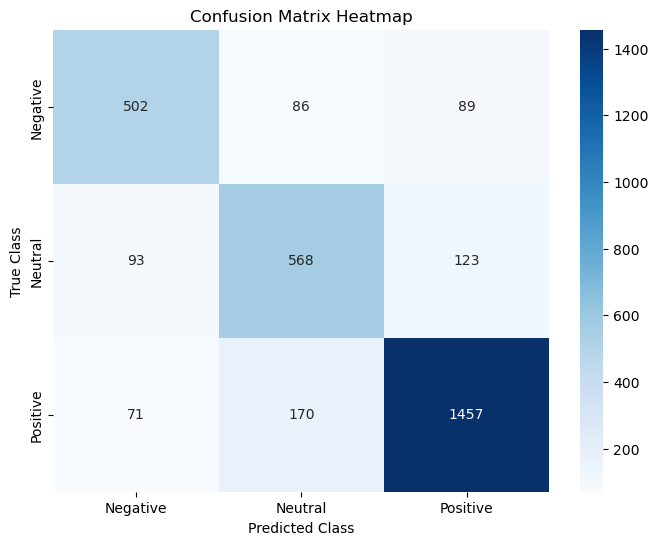

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = ["Negative", "Neutral", "Positive"]
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_enhanced_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Performance Insights:**
- The model performs well for the positive class, with the highest number of correct predictions (1448) and fewer misclassifications compared to other classes.
- Neutral class shows a moderate number of misclassifications, with a higher tendency to be confused with the positive class.
- Negative class has relatively fewer misclassifications but is more often confused with the neutral class than the positive class.

## <font color="red">2.  Classification Report Metrics Column Chart</font>

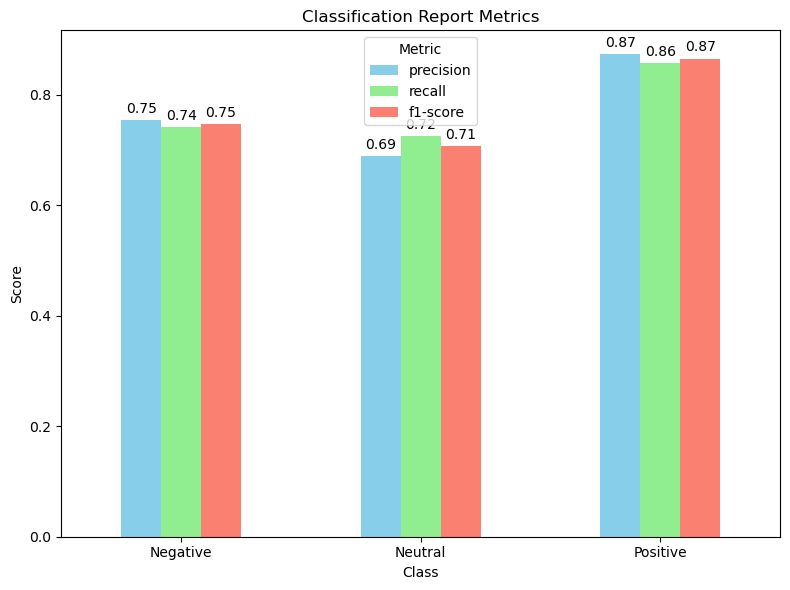

In [205]:

classes = ["Negative", "Neutral", "Positive"]

# Generate classification report
target_names = classes

# Convert classification report to DataFrame
df_metrics = pd.DataFrame(report_enhanced_lgbm).transpose()
df_metrics = df_metrics.loc[classes, ["precision", "recall", "f1-score"]]

# Plot classification report metrics
ax = df_metrics.plot(kind="bar", figsize=(8, 6), color=["skyblue", "lightgreen", "salmon"])
plt.title("Classification Report Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

**Overall Trends:**
- The positive class has the strongest performance, which is expected given the dataset's likely class imbalance.
- The neutral class is the most challenging for the model, as it shows the lowest precision, indicating confusion with neighboring sentiments (negative and positive).
- The negative class performs moderately well